In [1]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
from wikipedia2vec import Wikipedia2Vec

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

np.random.seed(4)
vectorDim = 100

numNode = 100

inputDataTraining = np.load('./trainingData_averaging/inputDataTraining_4k_average.npy')
outputDataTraining = np.load('./trainingData_averaging/outputDataTraining_4k_average.npy')
print(len(inputDataTraining))
print(len(outputDataTraining))

Using Numpy backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PeterDell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1526309
1526309


In [2]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [3]:
# leakingRate=0.2 changing too fast, mutliple with 0.05; changed
esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=0.05, regressionParameters=[1e-2], solver="lsqr", feedback=False)

In [4]:
#reservoirStatesBuffer[:,:resn]

in_small = inputDataTraining[:10000]
out_small = outputDataTraining[:10000]

print(len(in_small))
print(len(out_small))

10000
10000


In [5]:


esn.fit(in_small, out_small, transientTime="Auto", verbose=1)
#esn.fit(inputDataTraining[:,:1000], outputDataTraining[:,:1000], transientTime="Auto", verbose=1)

100% (9601 of 9601) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


0.04847913004712163

In [6]:
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')



In [7]:
#read in the narrative

huge_list = []

with open("NYT4.txt", "r") as f:
    huge_list = f.read().split()

#print(huge_list)   

discourse_words = huge_list

In [8]:
# clean it up
# large capital -> small capital

discourse_words = [s.replace(s, s.lower()) for s in discourse_words]

    # remove '.' and ',' from word list
discourse_words = [s.replace('.', '') for s in discourse_words]
discourse_words = [s.replace(',', '') for s in discourse_words]

    # remove stop words from word list
stop_words = stopwords.words('english')
    #print(stop_words)
for stop_word in stop_words:
    while stop_word in discourse_words :
        discourse_words.remove(stop_word)
            
            
    # remove "'s" and "'" and "-" and "'d" and "'ll" and "'ve" and "re" from word list
discourse_words = [s.replace("'s", '') for s in discourse_words]
discourse_words = [s.replace("'", '') for s in discourse_words]
discourse_words = [s.replace("-", ' ') for s in discourse_words]
discourse_words = [s.replace("'d", '') for s in discourse_words]
discourse_words = [s.replace("'ll", '') for s in discourse_words]
discourse_words = [s.replace("'ve", '') for s in discourse_words]
discourse_words = [s.replace("'re", '') for s in discourse_words]
discourse_words = [s.replace("(", '') for s in discourse_words]
discourse_words = [s.replace(")", '') for s in discourse_words]
discourse_words = [s.replace("[", '') for s in discourse_words]
discourse_words = [s.replace("]", '') for s in discourse_words]
discourse_words = [s.replace(",", '') for s in discourse_words]

#print(discourse_words)

In [9]:
inputDataTesting = np.empty((0,vectorDim))
print(inputDataTesting.shape)

for num in range(len(discourse_words)):
    inputDataTesting = np.append(inputDataTesting, np.array([wiki2vec.get_word_vector(discourse_words[num])]), axis=0)
    print(discourse_words[num], num, end = ' ')
print(inputDataTesting.shape)

(0, 100)
1867 0 world 1 fair 2 took 3 place 4 paris 5 japan 6 participated 7 first 8 time 9 displayed 10 coats 11 armor 12 swords 13 statues 14 ukiyo 15 e 16 french 17 went 18 wild 19 critic 20 fair 21 singled 22 hokusai 23 freest 24 sincere 25 japanese 26 masters 27 young 28 moderns 29 loved 30 prints 31 flat 32 spaces 33 simplified 34 lines 35 quotidian 36 subject 37 matter 38 hokusai 39 example 40 would 41 soon 42 influence 43 work 44 paris 45 modern 46 artists 47 mary 48 cassatt 49 instance 50 learned 51 hokusai 52 japanese 53 printmakers 54 create 55 spaces 56 blocky 57 color 58 hard 59 transitions 60 tone 61 tone 62 advent 63 caribbean 64 genetic 65 studies 66 archaeologists 67 provided 68 clues 69 origins 70 people 71 region 72 first 73 human 74 residents 75 caribbean 76 appear 77 lived 78 mostly 79 hunter 80 gatherers 81 catching 82 game 83 islands 84 fishing 85 sea 86 also 87 maintaining 88 small 89 gardens 90 crops 91 archaeologists 92 discovered 93 burials 94 ancient 95 peop

In [10]:
reservoirStatesBuffer = np.empty((0,numNode))
prediction,reservoirStatesBuffer  = esn.predict(inputDataTesting)
reservoirStatesBuffer = reservoirStatesBuffer.T
print(reservoirStatesBuffer.shape)
reservoirStatesBuffer = reservoirStatesBuffer[:,101:]
print(reservoirStatesBuffer.shape)
print(prediction.shape)

(278, 201)
(278, 100)
(278, 100)


In [11]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import csv

import scipy
from scipy import stats


In [12]:

sim_matrix = np.empty([len(reservoirStatesBuffer),len(reservoirStatesBuffer)])


for i in range(len(reservoirStatesBuffer)):
    for j in range(len(reservoirStatesBuffer)):
        sim_matrix[i,j] = 0
        
print(len(reservoirStatesBuffer[1]))
np.save('Exp1-NYT4-states.npy', reservoirStatesBuffer)

100


In [13]:
for i in range(len(reservoirStatesBuffer)):
    for j in range(len(reservoirStatesBuffer)):
        sim_matrix[i,j] = cos_sim(reservoirStatesBuffer[i],reservoirStatesBuffer[j])
            

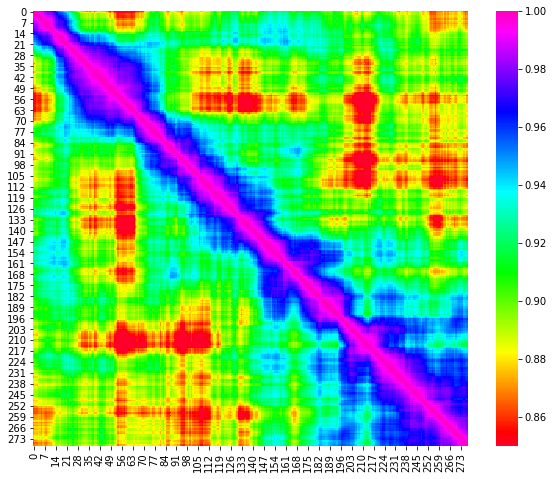

In [14]:
fig= plt.figure(figsize=(10,8))
plt.subplot(111)
# plasma YlGnBu twilight gist_rainbow
#sns.heatmap(similarity_matrix, annot=True, square=True, cmap='YlGnBu')
sns.heatmap(sim_matrix, square=True, cmap='gist_rainbow', vmin=0.85, vmax=1)
#sns.heatmap(sim_matrix, square=True)
#ax.set_ylim(len(sim_matrix), 0)
plt.savefig('reservoirstates-nyt4.png', dpi=600)